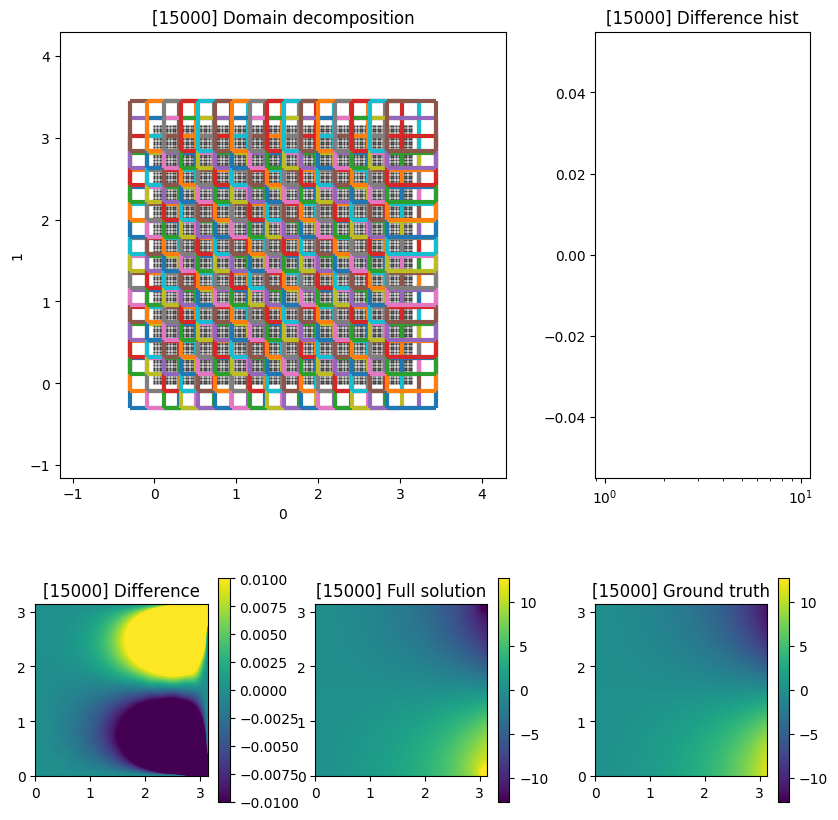

[INFO] 2024-12-05 01:35:55 - [i: 16000/100000] loss: 0.0903 rate: 502.4 elapsed: 0.02 hr test


KeyboardInterrupt: 

In [2]:
import numpy as np

from fbpinns.domains import RectangularDomainND
from fbpinns.problems import Laplace2D_2
from fbpinns.decompositions import RectangularDecompositionND
from fbpinns.networks import FCN
from fbpinns.schedulers import AllActiveSchedulerND
from fbpinns.constants import Constants, get_subdomain_ws
from fbpinns.trainers import FBPINNTrainer

pi = np.pi
XMIN, XMAX, YMIN, YMAX = 0, pi, 0, pi

subdomain_xs=[np.linspace(XMIN, XMAX, 16),
              np.linspace(YMIN, YMAX, 16)]

c = Constants(
    domain=RectangularDomainND,
    domain_init_kwargs = dict(
        xmin=np.array([0.,0.]),
        xmax=np.array([pi,pi])
        ),
    problem=Laplace2D_2,
    problem_init_kwargs = dict(sd=0.1),
    decomposition=RectangularDecompositionND,
    decomposition_init_kwargs=dict(
        subdomain_xs=subdomain_xs,
        subdomain_ws=get_subdomain_ws(subdomain_xs, 2.9),
        unnorm=(0.,3.),
    ),
    network=FCN,
    network_init_kwargs = dict(
        layer_sizes = (2, 6, 6, 6, 1),
    ),
    scheduler = AllActiveSchedulerND,
    ns=((100,100),),
    n_test=(100,100),
    n_steps=100000,
    clear_output=True,
)

run = FBPINNTrainer(c)
all_params = run.train()